# Decision Trees

**Decision Trees**, also know as Classification and Regression Trees (CART), are part of a family of machine learning models known as **Tree-Based Machine Learning Models**. One of their advantages is that they are easy to interpret since they produce simple decision rules that can be understood even by a non-technical audience. Based on features in the training data, decision tree models learn a series of questions to infer the class labels of samples. In the following figure, a decision tree is shown that helps a person to choose an action by asking yes or no questions.

<img src="tree.png" alt="Drawing" style="width: 500px;"/>

Image taken from [4]. 

Some of the advantages of decision trees are the following:

- As mentioned before, trees are very easy to explain to people. In fact, they are even easier to explain than linear regression.
- Some people believe that decision trees mirror more closely human decision-making than other regression and classification approaches.
- Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).
- Trees can easily handle qualitative predictors without the need to create dummy variables.

Unfortunately, decision trees tend to overfit the data and, generally, do not have the same level of predictive accuracy as some of the other regression and classification approaches [1].

The main goal of these models is to segment the feature space into simple rectangular regions, which is convenient since this allows us to do either regression or classification. 

## Regression Trees

Let us suppose that we have $n$ observations: 

$$D=\{(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)\},$$

where $x_i\in\mathbb{R}^n$ and $y_i\in\mathbb{R}$, $i=1,2,\dots,n$. Say we want to split the space where our data $D$ lives into $m$ regions $R_1,R_2,\dots,R_m$. Then, the **hypothesis** that we can implement with a **regression tree** is the following:

$$h(x)=\sum_{i=1}^mc_i\mathbb{1}_{R_i}(x),$$

where $\mathbb{1}_{R_i}(x)$ is the **indicator function**, $i=1,2,\dots,m$, which is equal to one if $x\in R_i$, and it is equal to zero otherwise.

Given the data $D$, the training process should return the optimal values of both the constants $\{c_i\}_{i=1}^m$ and the regions $\{R_i\}_{i=1}^m$. Let us define the following half-planes:

$$R_1(j,s)=\{X:X_j\leq s\},$$
$$R_2(j,s)=\{X:X_j> s\},$$,

where $X_j$ is the jth variable of the vector of variables $X$. Then, the optimal constants and regions can be obtained by solving the following optimization problem:

$$\min_{j,s}\left\{\min_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2+\min_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2\right\}$$

For each splitting variable, the determination of the split point $s$ can be done very quickly and by scanning through all of the inputs, determination of the best pair $(j, s)$ is achieved. Having found the best split, the data is split into the two resulting regions and the splitting process is repeated on each of these two regions. This process is repeated until we have $m$ regions.

In the following figure, the top right panel shows a partition of a two-dimensional feature space by recursive binary splitting, as used in CART, applied to some fake data. The top left panel shows a general partition that cannot be obtained from recursive binary splitting. Bottom left panel shows the tree corresponding to the partition in the top right panel, and a perspective plot of the prediction surface appears in the bottom right panel.

<img src="split.png" alt="Drawing" style="width: 500px;"/>

This image was taken from [2].

## Classification Trees

If the target is a classification outcome taking values $1,2,...,K$, the only changes needed in the tree algorithm pertain to the criteria for splitting the nodes. In a node $m$, representing a region $R_m$ with $n_m$ observations, let 

$$p_{mk}=\frac{1}{n_m}\sum_{i=1}^{n_m}\mathbb{1}_k(y_i)$$

be the proportion of class $k$ observations in node $m$. Now, let $k(m)$ be the *majority class in node $m$*:

$$k(m)=\text{argmax}_kp_{mk}.$$

Then, we can the following impurity measures:

$$\text{Missclasification Error: } 1-p_{mk(m)},$$
$$\text{Gini Index: } \sum_{k=1}^Kp_{mk}(1-p_{mk}),$$
$$\text{Cross-entropy: } -\sum_{k=1}^Kp_{mk}\log(p_{mk}).$$

<img src="impure.png" alt="Drawing" style="width: 500px;"/>

Image taken from [2].

Intuitively speaking, the training of a decision tree for classification goes as follows: first, among all the features that we are working with, we pick the one that splits the data the best as the root; that is, the feature with the lowest impurity. Then, given the partition created by the root node, out of all the remaining features, for each child node we choose the feature that yields the best separation. This splitting process may continue until there is no reduction in the impurity of the "youngest" child nodes. 

Consider the following image:

<img src="iris.png" alt="Drawing" style="width: 400px;"/>

In this case, using two features, petal lenght and petal width, we are using decision trees to distinguish among three types of **iris plants**. The data comes from the famous **iris dataset**, which is one of the many datasets included in the `scikit-learn` library. Image taken from [3].

Now, let us load some libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree

We will be using the `diabetes dataset`, which can be downloaded from this webpage: https://www.kaggle.com/vikasukani/diabetes-data-set. Let us take a peek into the data.

In [2]:
diabetes = pd.read_csv('diabetes-dataset.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
diabetes.groupby(by='Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


In the following two cells we process our data to divide it into a training and a test set. In this case the 80% percent of the data will be used for training and the rest for testing. For now we will focous on the training of the decision tree. Notice that in this case we will be using the `train_test_split` method from the `scikit-learn` library.

In [6]:
y = diabetes['Outcome']
X_data = diabetes.copy()
X_data = X_data.drop(columns='Outcome')
X_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [7]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=4)

In [9]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
875,2,123,48,32,165,42.1,0.520,26
1735,0,179,50,36,159,37.8,0.455,22
1729,4,128,70,0,0,34.3,0.303,24
362,5,103,108,37,0,39.2,0.305,65
890,1,119,88,41,170,45.3,0.507,26


In [10]:
y_test.head()

1893    1
898     0
1578    0
559     0
88      1
Name: Outcome, dtype: int64

In [11]:
X_train.shape

(1600, 8)

In [12]:
X_test.shape

(400, 8)

Now we can train our model.

In [13]:
clf = tree.DecisionTreeClassifier().fit(X_train,y_train)

Furthermore, we can visualize the decision tree that we obtained!

In [14]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

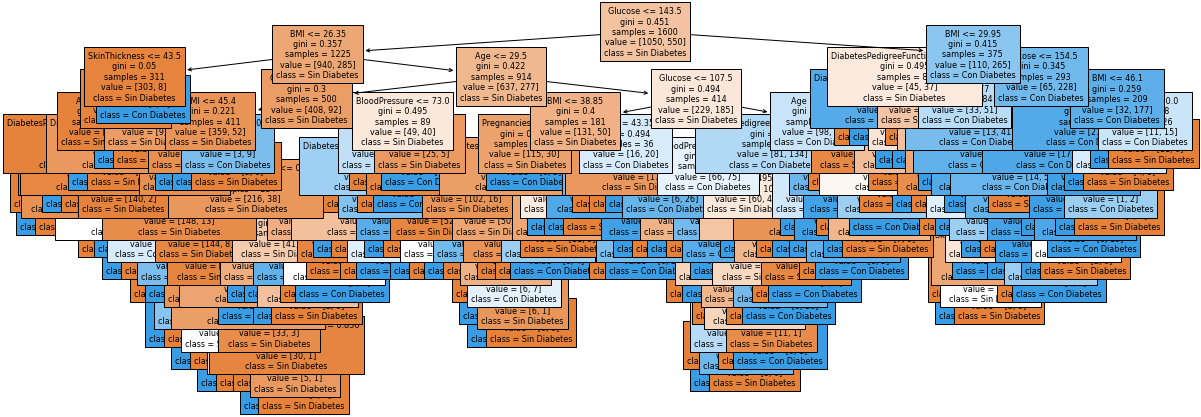

In [15]:
variables = X_train.columns
plt.figure(figsize=[20,7])
tree.plot_tree(clf, feature_names=variables, class_names=['Sin Diabetes', 'Con Diabetes'], fontsize=8, filled=True)
plt.show()

In [16]:
X_test.iloc[0:3,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1893,13,126,90,0,0,43.4,0.583,42
898,0,135,94,46,145,40.6,0.284,26
1578,5,110,68,0,0,26.0,0.292,30


And now we predict...

In [17]:
y_pred = clf.predict(X_test)
hits = sum(y_pred == y_test)
accuracy = hits / len(y_test)
accuracy

0.98

In [18]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [19]:
y_pred == y_test

1893     True
898      True
1578     True
559      True
88      False
        ...  
570      True
376      True
1249     True
492      True
922      True
Name: Outcome, Length: 400, dtype: bool

In [20]:
len(y_test)

400

## Bibliography

[1] *James, Gareth, et al., "An introduction to statistical learning," Vol. 112. New York: springer, 2013*.

[2] *Hastie, T., Tibshirani, R., Friedman, J. H., "The elements of statistical learning: data mining, inference, and prediction," New York, Springer, 2009.*

[3].*Raschka, Sebastian, and Vahid Mirjalili, "Python machine learning: Machine learning and deep learning with Python," Second edition, 2017*.

[4] *Dangeti, Pratap, "Statistics for machine learning," Packt Publishing Ltd., 2017*.